<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/07a-planets.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 07a -- planets

GroupBy operations and MultiIndex (in Python with Pandas)

* [3.08 Aggregation and Grouping](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.08-Aggregation-and-Grouping.ipynb) -- VanderPlas
* [GroupBy](https://pandas.pydata.org/docs/reference/groupby.html) -- pandas.pydata.org
* [Planets dataset](https://github.com/mwaskom/seaborn-data) (seaborn) -- github

In [ ]:
# Extrasolar planets (exoplanets) discovered around other stars
import seaborn as sns
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
planets[planets.number > 1]

,method,number,orbital_period,mass,distance,year
9,Radial Velocity,2,452.8000,1.99,74.79,2010
10,Radial Velocity,2,883.0000,0.86,74.79,2010
13,Radial Velocity,3,1078.0000,2.53,14.08,1996
14,Radial Velocity,3,2391.0000,0.54,14.08,2001
15,Radial Velocity,3,14002.0000,1.64,14.08,2009
...,...,...,...,...,...,...
925,Microlensing,2,NaN,NaN,4080.00,2012
926,Microlensing,2,NaN,NaN,4080.00,2012
941,Pulsar Timing,3,25.2620,NaN,NaN,1992
942,Pulsar Timing,3,66.5419,NaN,NaN,1992


In [ ]:
planets[planets.method=='Pulsar Timing']

,method,number,orbital_period,mass,distance,year
941,Pulsar Timing,3,25.262000,NaN,NaN,1992
942,Pulsar Timing,3,66.541900,NaN,NaN,1992
943,Pulsar Timing,3,98.211400,NaN,NaN,1994
944,Pulsar Timing,1,36525.000000,NaN,NaN,2003
945,Pulsar Timing,1,0.090706,NaN,1200.0,2011


In [ ]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


# Group By -- Computation on arrays


* [2.01 -- Aggregations: Min, Max, and Everything In Between](https://render.githubusercontent.com/view/02.04-Computation-on-arrays-aggregates.ipynb) -- VanderPlas
  * Numpy's built-in functions for aggregation and summary statistics
* [SQL GROUP BY](https://www.w3schools.com/sql/sql_groupby.asp) -- w3schools
  * SQL GROUP BY examples using relational tables
* [Pandas GroupBy](https://pandas.pydata.org/docs/reference/groupby.html) -- pydata.org
  * Pandas API Reference documentation
  * [Split, Apply, Combine](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#GroupBy:-Split,-Apply,-Combine) -- VanderPlas

In [ ]:
# Pandas built-in summary statistics
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


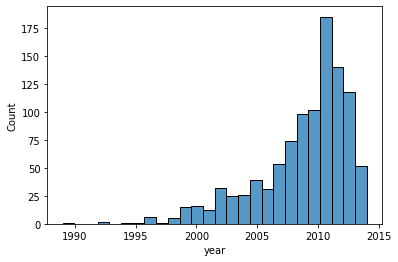

In [ ]:
sns.histplot(planets['year']); # , kde=True);

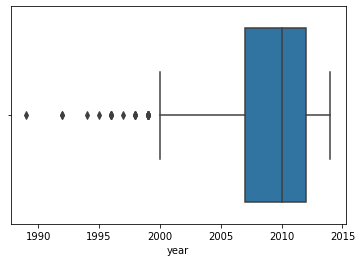

In [ ]:
sns.boxplot(x='year', data=planets);

# Explanation of left-skewed distribution

Sampling bias associated with the [Kepler mission](https://www.nasa.gov/mission_pages/kepler/overview/index.html), launched in 2009

In [ ]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [ ]:
# Pandas groupby() method returns a "GroupBy" object
dg = planets.groupby('method')
dg

In [ ]:
# No computation is done until you perform a method on the object
# You can sample a single column (operation as with a Series object)
dg['orbital_period'].mean()

method
Astrometry                          631.180000
Eclipse Timing Variations          4751.644444
Imaging                          118247.737500
Microlensing                       3153.571429
Orbital Brightness Modulation         0.709307
Pulsar Timing                      7343.021201
Pulsation Timing Variations        1170.000000
Radial Velocity                     823.354680
Transit                              21.102073
Transit Timing Variations            79.783500
Name: orbital_period, dtype: float64

In [ ]:
# Or all the columns (as with a DataFrame)
dg.median()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.0,631.180000,NaN,17.875,2011.5
Eclipse Timing Variations,2.0,4343.500000,5.125,315.360,2010.0
Imaging,1.0,27500.000000,NaN,40.395,2009.0
Microlensing,1.0,3300.000000,NaN,3840.000,2010.0
Orbital Brightness Modulation,2.0,0.342887,NaN,1180.000,2011.0
Pulsar Timing,3.0,66.541900,NaN,1200.000,1994.0
Pulsation Timing Variations,1.0,1170.000000,NaN,NaN,2007.0
Radial Velocity,1.0,360.200000,1.260,40.445,2009.0
Transit,1.0,5.714932,1.470,341.000,2012.0


In [ ]:
dg['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


## Iterating over groups

Some operations will throw an Error (e.g., GroupBy has no attribute "shape")

```
dg.shape
```

But you can iterate over groups...

In [ ]:
for (method, group) in dg:
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


# Multi-indexing

* [Pandas MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html) API reference docs

In [ ]:
# Create a multiple indexed Series from a collection of tuples
import pandas as pd
import numpy as np

tuples = [('one', 'a'), ('one', 'b'),
          ('two', 'a'), ('two', 'b')]
index = pd.MultiIndex.from_tuples(tuples)

# You can name the indexes
#index = pd.MultiIndex.from_tuples(tuples, names=('Hello, world!', "It's me."))

# Construct a multi-index Series
s = pd.Series(np.arange(1.0, 5.0), index=index)
s

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

## Unstack (pivot) on an index

Note the difference with named indexes.

In [ ]:
s.unstack()

,a,b
one,1.0,2.0
two,3.0,4.0


In [ ]:
s.unstack(level=1)

,a,b
one,1.0,2.0
two,3.0,4.0


In [ ]:
s.unstack(level=-1)

,a,b
one,1.0,2.0
two,3.0,4.0


In [ ]:
s.unstack(level=0)

,one,two
a,1.0,3.0
b,2.0,4.0


# MultiIndex with planets

A demonstration

In [ ]:
# Create a new column (Series) that defines the "decade"
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'

# Group by both method and decade
planets.groupby(['method', decade])['number'].count()

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       3
                               2010s       6
Imaging                        2000s      20
                               2010s      18
Microlensing                   2000s      10
                               2010s      13
Orbital Brightness Modulation  2010s       3
Pulsar Timing                  1990s       3
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      28
                               2000s     309
                               2010s     215
Transit                        2000s      62
                               2010s     335
Transit Timing Variations      2010s       4
Name: number, dtype: int64

In [ ]:
# Unpivot to see things more clearly -- explanet count by decade
# Reveals the more modern methods
planets.groupby(['method', decade])['number'].count().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,3.0,6.0
Imaging,0.0,0.0,20.0,18.0
Microlensing,0.0,0.0,10.0,13.0
Orbital Brightness Modulation,0.0,0.0,0.0,3.0
Pulsar Timing,0.0,3.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,28.0,309.0,215.0
Transit,0.0,0.0,62.0,335.0
